In [6]:
import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import importlib
import datasets
import callbacks
import cifar10_model_test
import util
import profiler
from sklearn.model_selection import StratifiedShuffleSplit
from tensorflow.keras import losses, optimizers, metrics
from models import AlexNet, Resnet_update, BaseModel

In [2]:
train_dataset, train_num = datasets.dogs_cats(init=False, training=True)

In [3]:
train_dataset = train_dataset.shuffle(train_num)

In [4]:
valid_num = int(train_num * 0.3)
train_data = train_dataset.skip(valid_num).shuffle(train_num - valid_num).batch(8).prefetch(1)
valid_data = train_dataset.take(valid_num).shuffle(valid_num).batch(8).prefetch(1)

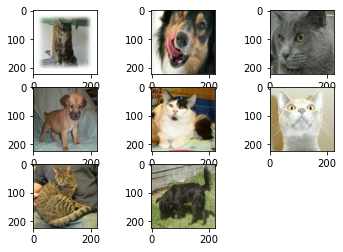

In [5]:
for x, y in train_data:
    for i in range(8):
        plt.subplot(3, 3, i+1)
        plt.imshow(x[i])
    break

In [8]:
model = BaseModel.GradCamModel(Resnet_update.resnet50())

opt = optimizers.Adam(learning_rate=1e-3)
loss_func = losses.SparseCategoricalCrossentropy()
metric_func = metrics.SparseCategoricalAccuracy()

model.compile(optimizer=opt, loss=loss_func, metrics=[metric_func])

In [10]:
model.fit(train_data, validation_data=valid_data, epochs=1, verbose=2,
         callbacks=[callbacks.GetTensorboardCallback("../tensor_board/" + "layer_norm")])

2188/2188 - 428s - loss: 0.6102 - sparse_categorical_accuracy: 0.5028 - val_loss: 0.5952 - val_sparse_categorical_accuracy: 0.5275 - 428s/epoch - 196ms/step
